# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [30]:
import sklearn
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)


#load penguins and clear NA's
!pip install PalmerPenguins
from palmerpenguins import load_penguins
df = load_penguins()
clean_df = df.dropna()
df = clean_df

Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

In [31]:
#set the ct transformer for all the models
ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

In [39]:
#KNN 30 Model
warnings.simplefilter('ignore', ConvergenceWarning)

X= df.drop(['species'], axis=1)
y= df['species']

#create the pipeline

knn_pipeline_30 = Pipeline(
  [("preprocessing", ct),
  ("knn_classifier", KNeighborsClassifier(n_neighbors=30))]
)

#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

#fit the model
knn_fitted = knn_pipeline_6.fit(X_train,y_train)

#Predict species
pred_1 = knn_fitted.predict(X_test)

#Find Metrics

#Confusion Matrix
confusion1 = confusion_matrix(y_test, pred_1)
print(confusion1)
#Accuracy
accuracy1 = accuracy_score(y_test, pred_1)
print(accuracy1)
#AUC
prob = knn_fitted.predict_proba(X_test)
auc1 = roc_auc_score(y_test, prob, multi_class='ovr')
print(auc1)
#Precision, Recall, F_1
class1 = classification_report(y_test, pred_1)
print(class1)

[[48  0  0]
 [ 1 22  0]
 [ 0  0 29]]
0.99
1.0
              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        48
   Chinstrap       1.00      0.96      0.98        23
      Gentoo       1.00      1.00      1.00        29

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



In [38]:
#KNN 150 Model
warnings.simplefilter('ignore', ConvergenceWarning)

#create the pipeline
knn_pipeline_150 = Pipeline(
  [("preprocessing", ct),
  ("knn_classifier", KNeighborsClassifier(n_neighbors=150))]
)

#fit the model
knn_fitted = knn_pipeline_150.fit(X_train,y_train)

#Predict species
pred_2 = knn_fitted.predict(X_test)

#Find Metrics

#Confusion Matrix
confusion2 = confusion_matrix(y_test, pred_2)
print(confusion2)
#Accuracy
accuracy2 = accuracy_score(y_test, pred_2)
print(accuracy2)
#AUC
prob = knn_fitted.predict_proba(X_test)
auc2 = roc_auc_score(y_test, prob, multi_class='ovr')
print(auc2)
#Precision, Recall, F_1
class2 = classification_report(y_test, pred_2)
print(class2)

[[48  0  0]
 [23  0  0]
 [ 0  0 29]]
0.77
0.9679554292326031
              precision    recall  f1-score   support

      Adelie       0.68      1.00      0.81        48
   Chinstrap       0.00      0.00      0.00        23
      Gentoo       1.00      1.00      1.00        29

    accuracy                           0.77       100
   macro avg       0.56      0.67      0.60       100
weighted avg       0.61      0.77      0.68       100



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
#Decion Trees 3 Model
warnings.simplefilter('ignore', ConvergenceWarning)

#create the pipeline
tree_pipeline_3 = Pipeline(
  [("preprocessing", ct),
  ("tree_classifier", DecisionTreeClassifier(max_depth=3, min_samples_leaf=3))]
)

#fit the model
tree_fitted = tree_pipeline_3.fit(X_train,y_train)

#Predict species
pred_3 = tree_fitted.predict(X_test)

#Find Metrics

#Confusion Matrix
confusion3 = confusion_matrix(y_test, pred_3)
print(confusion3)
#Accuracy
accuracy3 = accuracy_score(y_test, pred_3)
print(accuracy3)
#AUC
prob = tree_fitted.predict_proba(X_test)
auc3 = roc_auc_score(y_test, prob, multi_class='ovr')
print(auc3)
#Precision, Recall, F_1
class3 = classification_report(y_test, pred_3)
print(class3)

[[47  1  0]
 [ 3 20  0]
 [ 1  0 28]]
0.95
0.9839996205485336
              precision    recall  f1-score   support

      Adelie       0.92      0.98      0.95        48
   Chinstrap       0.95      0.87      0.91        23
      Gentoo       1.00      0.97      0.98        29

    accuracy                           0.95       100
   macro avg       0.96      0.94      0.95       100
weighted avg       0.95      0.95      0.95       100



In [42]:
#Decion Trees 30 Model
warnings.simplefilter('ignore', ConvergenceWarning)

#create the pipeline
tree_pipeline_30 = Pipeline(
  [("preprocessing", ct),
  ("tree_classifier", DecisionTreeClassifier(max_depth=30, min_samples_leaf=30))]
)

#fit the model
tree_fitted = tree_pipeline_30.fit(X_train,y_train)

#Predict species
pred_4 = tree_fitted.predict(X_test)

#Find Metrics

#Confusion Matrix
confusion4 = confusion_matrix(y_test, pred_4)
print(confusion4)
#Accuracy
accuracy4 = accuracy_score(y_test, pred_4)
print(accuracy4)
#AUC
prob = tree_fitted.predict_proba(X_test)
auc4 = roc_auc_score(y_test, prob, multi_class='ovr')
print(auc4)
#Precision, Recall, F_1
class4 = classification_report(y_test, pred_4)
print(class4)

[[47  1  0]
 [ 3 19  1]
 [ 0  1 28]]
0.94
0.9804000298220067
              precision    recall  f1-score   support

      Adelie       0.94      0.98      0.96        48
   Chinstrap       0.90      0.83      0.86        23
      Gentoo       0.97      0.97      0.97        29

    accuracy                           0.94       100
   macro avg       0.94      0.92      0.93       100
weighted avg       0.94      0.94      0.94       100



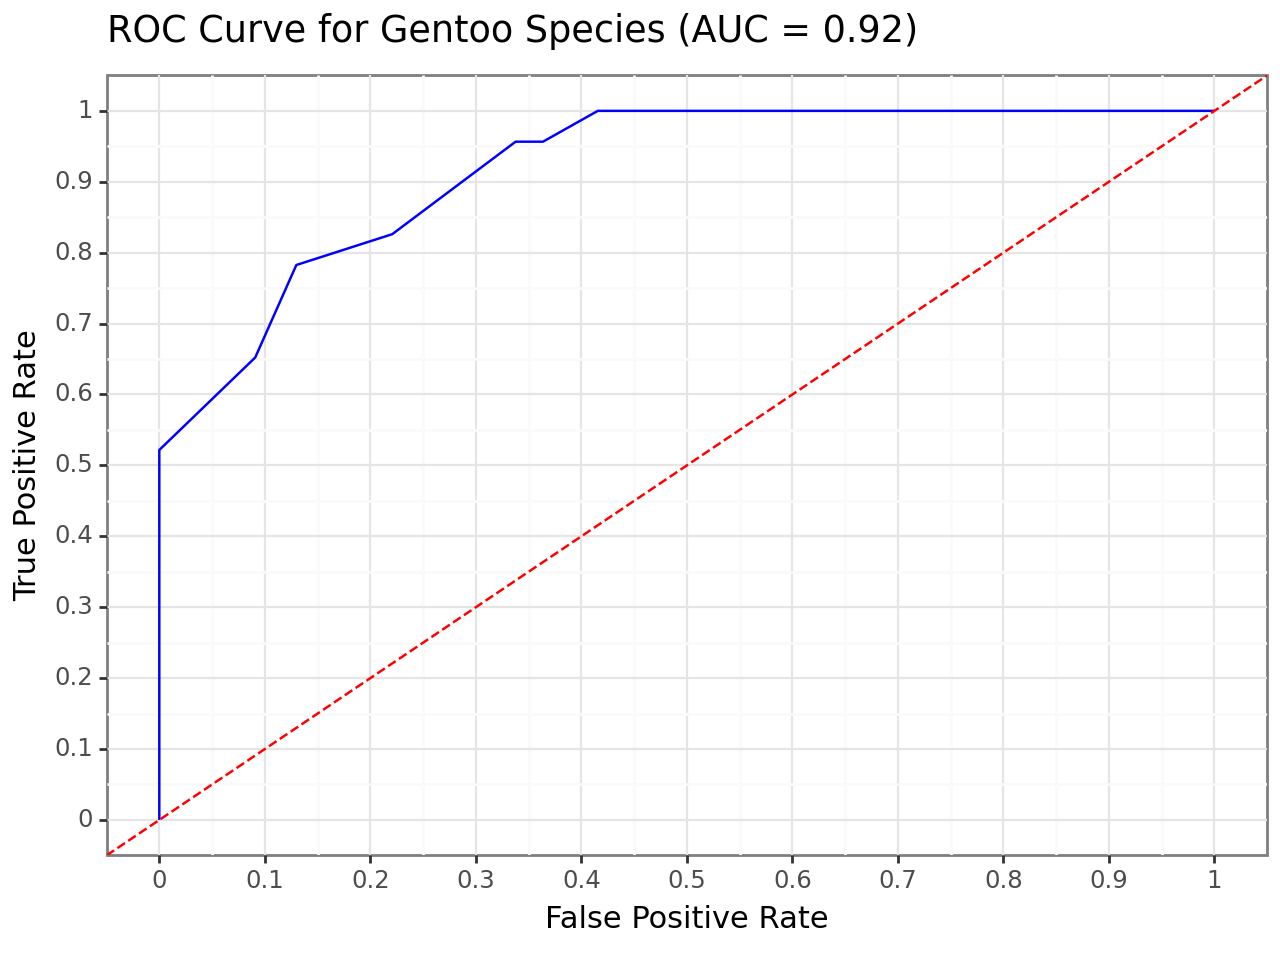

<Figure Size: (640 x 480)>

In [51]:
#graph for KNN 150
import plotnine as p9
from plotnine import *
from sklearn.metrics import roc_curve

#bin Chinstrap species
y_train_bin = (y_train == 'Chinstrap').astype(int)
y_test_bin = (y_test == 'Chinstrap').astype(int)

#fit model
knn_fitted = knn_pipeline_150.fit(X_train, y_train_bin)

#predict probabilities
probs = knn_fitted.predict_proba(X_test)[:,1]

#compute the ROC Metrics
fpr, tpr, thresholds = roc_curve(y_test_bin, probs)
roc_auc = roc_auc_score(y_test_bin, probs)

#create dataframe for the graph
roc_data = pd.DataFrame({
    'FPR': fpr,
    'TPR': tpr
})

#plot the graph
roc_plot = (
    ggplot(roc_data, aes(x='FPR', y='TPR')) +
    geom_line(color='blue') +
    geom_abline(linetype='dashed', color='red') +
    labs(x='False Positive Rate', y='True Positive Rate', title='ROC Curve for Chinstrap Species (AUC = %0.2f)' % roc_auc) +
    theme_bw() +
    scale_y_continuous(breaks=np.arange(0, 1.1, 0.1)) +
    scale_x_continuous(breaks=np.arange(0, 1.1, 0.1))
)

roc_plot